In [1]:
using Revise

In [23]:
using PMDPs
import PMDPs.demand_intensity_indpendent_start_time_and_duration
using PMDPs.LP
using DrWatson
using RandomNumbers.Xorshifts
using MCTS
using POMDPSimulators
using POMDPPolicies
using DiscreteValueIteration

using Format

import Base.show

using Plots
using Distributions
using ProgressMeter


using POMDPs
using DataFrames

using DataFrames
using Statistics
using PMDPs
using CSV
using Plots
using StatsBase
using HypothesisTests

In [34]:
nᵣ = 12
pp_params = Dict(pairs((
        nᵣ = nᵣ,
        c = 3,
        T = nᵣ*8,
        expected_res = 2*nᵣ, # keeps the expected demand constant for different numbers of resources, at average 2 per hour-long slot.
        res_budget_μ = 24.0/nᵣ, # assuming nᵣ is number of timeslots in one day, this means that budget remains 1 per hour.
        objective = :revenue,
    )))

pp = PMDPs.single_day_cs_pp(;pp_params...)

MY SHEIIIIIZEEEEEE


PMDPs.PMDPProblem(PMDPs.Product[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]  …  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0], [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0], [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0], [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], 96, PMDPs.CountingProcesses.StaggeredBernoulliScheme([8, 16, 24, 32, 40, 48, 56, 64, 72, 80  …  8, 16, 24, 32, 8, 16, 24, 8, 16, 8], [0.0005931799151348794, 0.0025385

In [35]:
mg = PMDPs.PMDPg(pp)
requested_resources = []
starts = []
durations = []
for i in 1:100
    h = PMDPs.simulate_trace(mg, Xorshift1024Plus(i));
    non_empty_p = collect([pp.P[s.iₚ] for s in h[:s] if s.iₚ!=PMDPs.empty_product_id(mg)])
    push!(requested_resources, sum(sum(non_empty_p)))
    push!(starts, findfirst.(non_empty_p))
    push!(durations, sum.(non_empty_p))
end
mean(requested_resources)

24.11

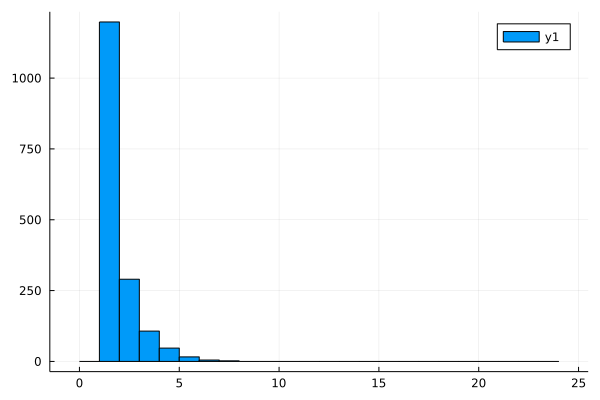

In [36]:
h = fit(Histogram, vcat(durations...), 0:1:24)
plot(h)

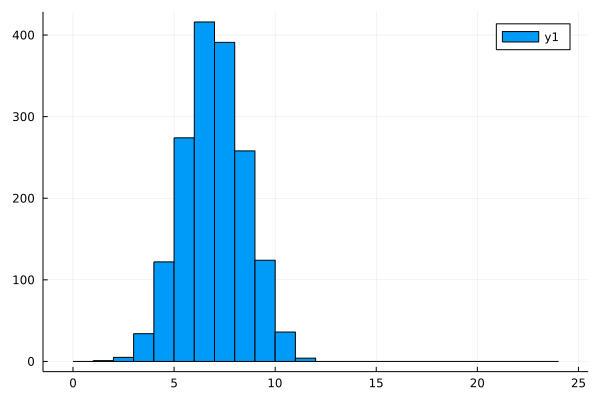

In [37]:
h = fit(Histogram, vcat(starts...), 0:1:24)
plot(h)

In [18]:
h = PMDPs.simulate_trace(mg, Xorshift1024Plus(2));

non_empty_p = collect([pp.P[s.iₚ] for s in h[:s] if s.iₚ!=PMDPs.empty_product_id(mg)])
for p in non_empty_p
    print(*(string.(Int64.(p))...))
    println(" ", sum(p))
end

111110000000 5
111111100000 7
111111100000 7
111000000000 3
001111100000 5
001111111100 8
001111111000 7
